<a href="https://colab.research.google.com/github/herusy/Machine_Learning/blob/main/%D0%93%D0%B5%D1%80%D1%83%D1%81_%D0%BF%D1%80_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Герус Я.О. ФІТ 4-8

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

#1 Роздрукувати перші 5 рядків.

df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
#2. Вивести розмір датасета.

df.shape

(2392, 15)

In [ ]:
#3 Визначити тип даних.
print("\nТипи даних стовпців:\n", df.dtypes)


Типи даних стовпців:
 StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [ ]:
#4 Перевірити на пропущені значення. При наявності замінити на середнє за
#стовпцем.

print("Пропущені значення в кожному стовпці:\n", df.isnull().sum())

df = df.fillna(df.mean(numeric_only=True))

Пропущені значення в кожному стовпці:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
#4 Перевірити на дублікати. Якщо є – видалити.

print(f"Кількість дублікатів у датасеті: {df.duplicated().sum()}")

Кількість дублікатів у датасеті: 0


In [ ]:
#5 Вивести описову статистику.

df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

1. Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

y_pred_rf = grid_search_rf.predict(X_test)
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9210640711932525
Test accuracy for Random Forest: 0.8872651356993737


2. Logistic Regression

In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

lr = LogisticRegression(random_state=42, max_iter=1000)

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

y_pred_lr = grid_search_lr.predict(X_test)
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.7710333137396963
Test accuracy for Logistic Regression: 0.7369519832985386


3. Support Vector Machine (SVM)

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
}

svm = SVC(random_state=42)

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)

y_pred_svm = grid_search_svm.predict(X_test)
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.8557147348707502
Test accuracy for SVM: 0.824634655532359


In [ ]:
# Порівняння результатів

print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

print("Classification report for the best model (Random Forest, Logistic Regression, or SVM):")
print(classification_report(y_test, y_pred_rf))

Test accuracy for Random Forest: 0.8872651356993737
Test accuracy for Logistic Regression: 0.7369519832985386
Test accuracy for SVM: 0.824634655532359
Classification report for the best model (Random Forest, Logistic Regression, or SVM):
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.76      0.86      0.81        49
         2.0       0.88      0.80      0.84        85
         3.0       0.83      0.84      0.83        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.89       479
   macro avg       0.86      0.79      0.81       479
weighted avg       0.89      0.89      0.88       479



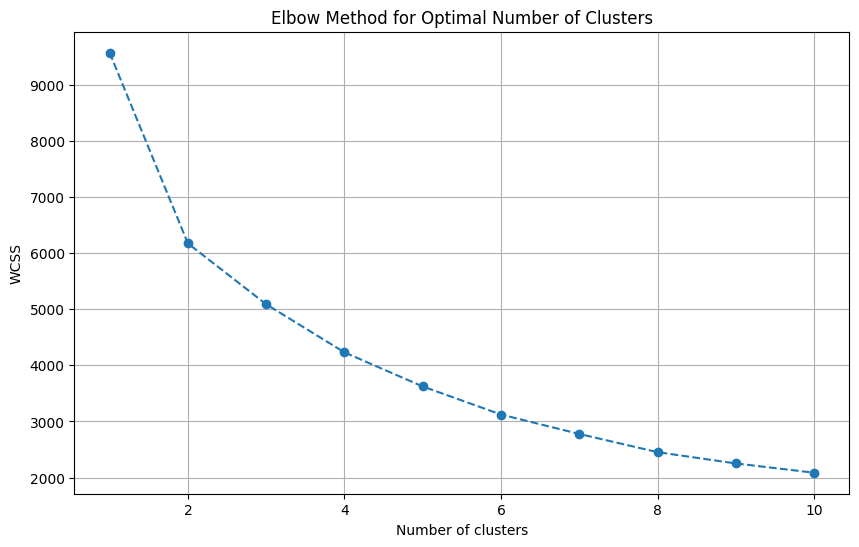

In [ ]:
# Метод ліктя

features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

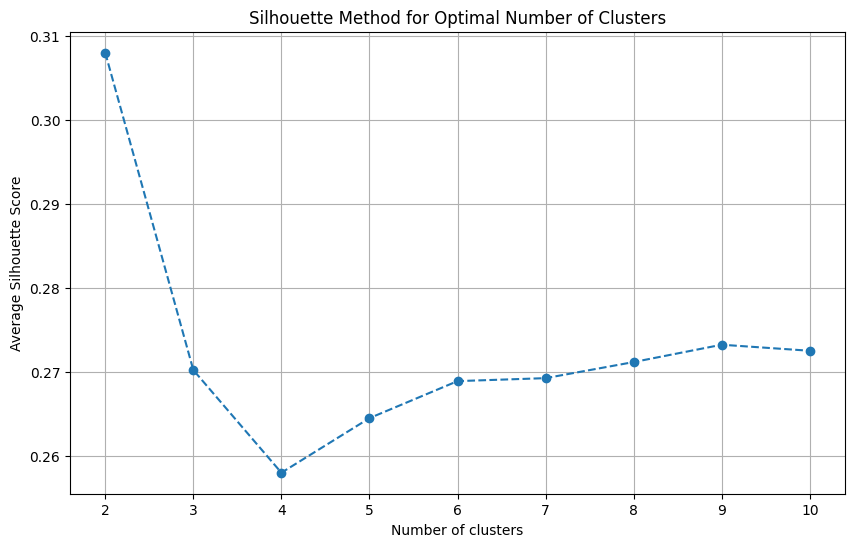

In [ ]:
# Метод силуетів

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()


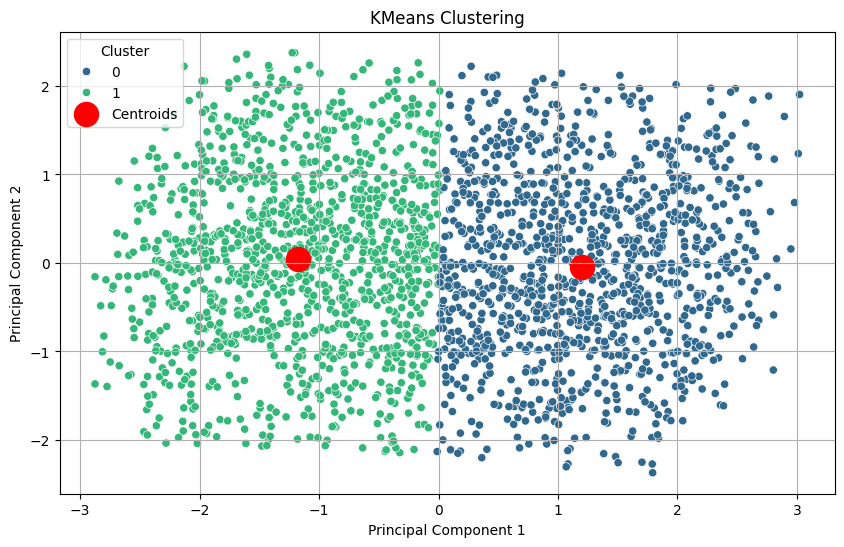

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**Висновок:** ліктевий метод показує точку, де відбувається "злам" на графіку суми квадратів відстаней до центрів кластерів (WCSS). Оптимальна кількість кластерів метозу силуетів визначається за найвищим середнім значенням коефіцієнта силуету. Результати двох методів збігаються.

